# PROBLEMA 5 LISTA 2

### CARGAR LOS DATOS

In [81]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

try:
    dataset = fetch_ucirepo(id=544)
    data = pd.DataFrame(dataset.data['features'])
    print(dataset)

    target = pd.DataFrame(dataset.data['targets'], columns=["NObeyesdad"])

    full_data = pd.concat([data, target], axis=1)

except Exception as ex:
    print(ex)


{'data': {'ids': None, 'features':       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

    

### VISUALIZACION DE LOS DATOS MINIMA

In [82]:
categorical_columns = list(full_data.dtypes[full_data.dtypes == 'O'].index.values)
print("Variables Categoricas:", categorical_columns)

print(full_data.columns)


tipos_variables = full_data.dtypes


valores_unicos = full_data.nunique()


resumen = pd.DataFrame({'Tipo': tipos_variables, 'Valores Únicos': valores_unicos})
print(resumen)

print(full_data['CAEC'].unique())

full_data.head()

Variables Categoricas: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
                                   Tipo  Valores Únicos
Gender                           object               2
Age                             float64            1402
Height                          float64            1574
Weight                          float64            1525
family_history_with_overweight   object               2
FAVC                             object               2
FCVC                            float64             810
NCP                             float64             635
CAEC                             object               4
SMOKE                            object               2
CH2O                            floa

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## APARTADO A

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [84]:
X = full_data.drop('NObeyesdad', axis=1)
y = full_data['NObeyesdad']

In [85]:
def one_hot_encoding(X, scaler=None):
    categorical_columns =X.dtypes[X.dtypes == 'object'].index.values
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 

        scaler = StandardScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])

        
    for c in categorical_columns:
        if X[c].nunique() == 2:
            X[c] = X[c].astype('category').cat.codes
        else:
            X_one_hot = pd.get_dummies(X[c], prefix=c, dtype=int)
            X = X.merge(X_one_hot, left_index=True, right_index=True)
            X = X.drop(columns=[c])

    return X


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train_scaled = one_hot_encoding(X_train)
X_test_scaled = one_hot_encoding(X_test)



X_train_scaled.T




,90,513,1100,339,612,1410,1921,1052,1572,65,...,1228,213,2072,1998,1178,1567,1336,609,1659,237
Gender,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
Age,0.109980,-0.486997,-0.819651,-0.843440,-0.204896,-0.858136,0.255936,1.383631,0.717829,-0.525633,...,0.267992,-0.525633,-0.935051,-0.479239,-0.734609,0.987262,-0.523866,-0.687745,-0.185358,-0.843440
Height,-0.768729,-1.108078,-0.027893,-1.829824,-1.248503,-0.556510,-0.861776,0.313164,1.197980,-0.874838,...,0.539825,1.035134,0.350313,1.037256,-0.019309,0.865878,1.632690,0.540239,1.558328,-0.662619
Weight,0.243270,-1.605172,-0.332517,-1.714405,-1.623176,-0.178271,0.703393,-0.090087,1.295032,-0.677989,...,0.819012,-0.946689,1.540640,2.632504,-0.330666,1.304414,1.209970,-1.215491,1.343358,-1.292161
family_history_with_overweight,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FAVC,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FCVC,1.083340,1.083340,-2.523759,-0.811598,-0.423299,1.083340,1.083340,-0.811598,1.021375,-2.706535,...,1.083340,1.083340,1.083340,1.083340,-1.468988,0.134181,-0.811598,-0.811598,1.083340,1.083340
NCP,1.695904,-1.236600,-0.249888,0.406177,-0.718727,0.406177,0.406177,0.406177,0.406177,0.406177,...,0.406177,0.406177,0.406177,0.406177,0.088153,0.406177,0.406177,1.044397,-0.225615,0.406177
SMOKE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CH2O,-1.686219,0.698921,0.708738,-1.686219,0.164073,-1.686219,-0.607633,0.305483,0.840811,-0.034603,...,-0.402928,-0.034603,0.603565,0.545433,0.282611,0.033034,1.617012,1.578483,-0.541051,-1.686219


### Visualizacion de los datos

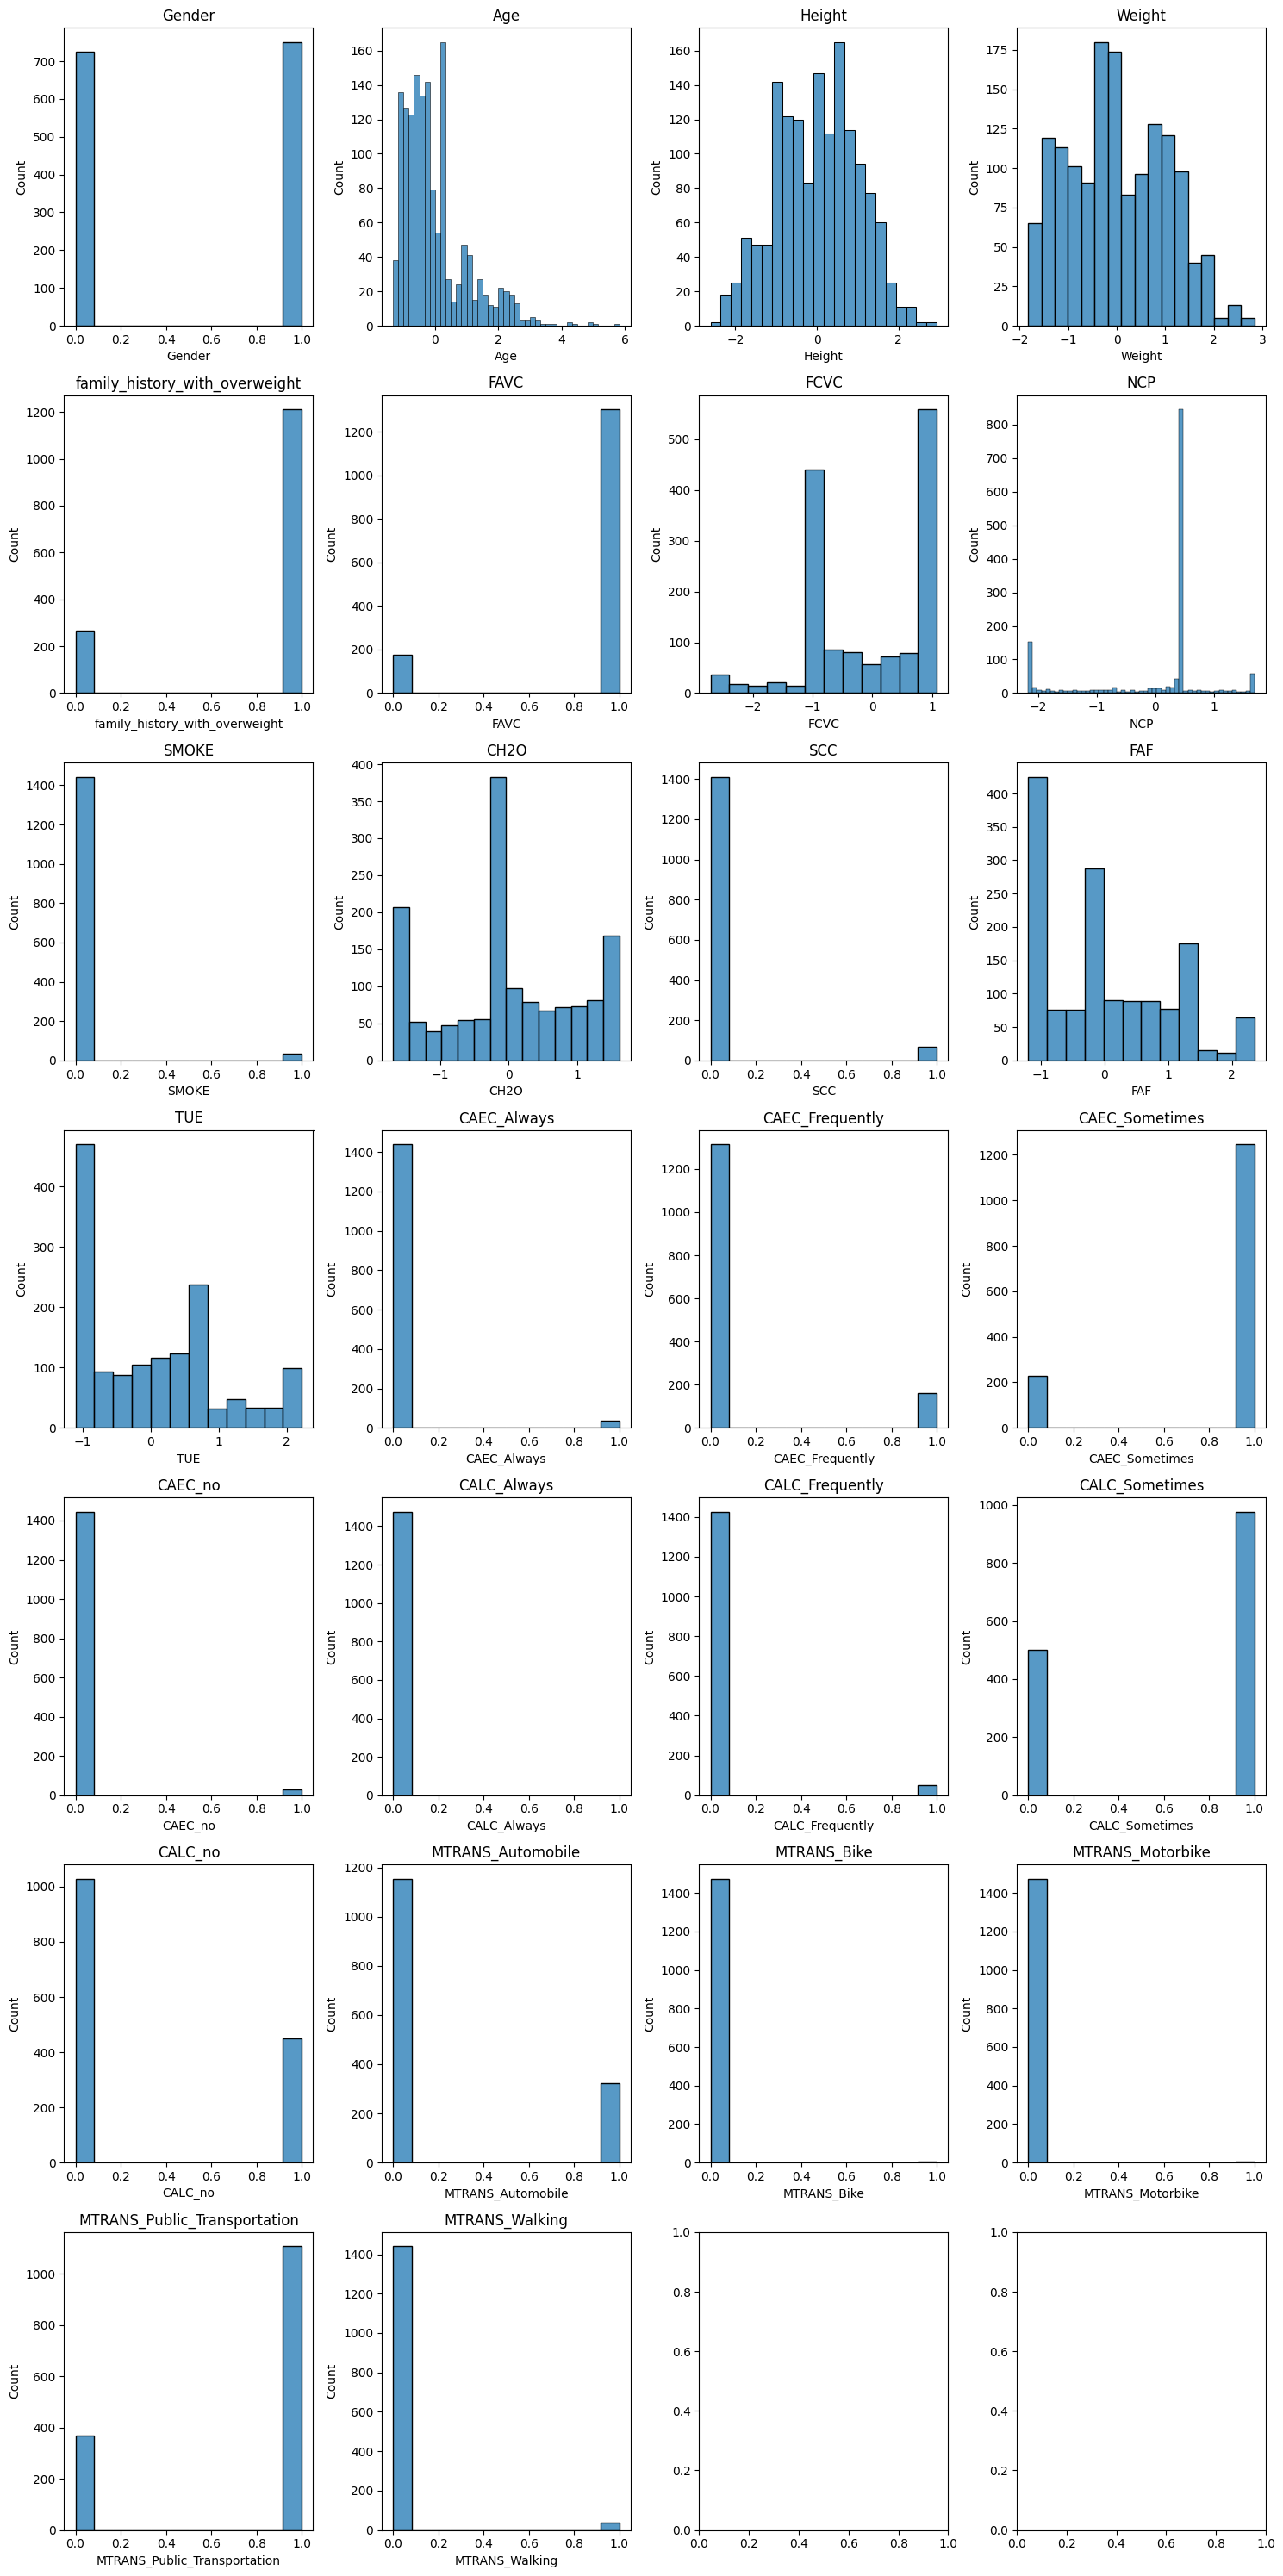

In [87]:
fig, axes = plt.subplots(7,4,figsize=(15,30))


for i, c in enumerate(X_train_scaled.columns):
    ax = axes.reshape(-1)[i]
    if X_train_scaled[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_scaled,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_scaled,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()